In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





Data Collection & Analysis

In [20]:
# Load dataset
df = pd.read_csv('ecommerce_traffic_data.csv')

In [21]:
# first 5 rows of the dataframe
df.head()

,User_ID,Session_Duration,Pages_Viewed,Geolocation,Traffic_Source,Bounce_Rate,Time_on_Site,Clicks,Device_Type,Browser,Operating_System,Product_Views,Cart_Additions,Purchases,Abandonment_Rate,Session_Timestamp
0,2,903.04,4,Australia,Direct,75.75,12.75,4,Mobile,Edge,iOS,0,0,0,100.0,2024-08-10 02:36:46.770091
1,4,273.88,10,Germany,Organic Search,70.92,4.05,4,Mobile,Safari,Linux,2,1,0,100.0,2024-08-28 00:00:10.770091
2,5,50.89,3,Australia,Social Media,20.03,14.06,4,Tablet,Chrome,Android,2,0,0,100.0,2024-08-16 09:21:47.770091
3,6,50.88,4,France,Organic Search,21.10,10.46,2,Desktop,Chrome,Windows,0,0,0,100.0,2024-07-17 09:21:50.770091
4,7,17.95,7,USA,Social Media,68.83,10.15,3,Tablet,Chrome,Linux,1,0,0,100.0,2024-09-07 00:42:55.770091


In [22]:
# number of rows and columns
df.shape

(996, 16)

In [23]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            996 non-null    int64  
 1   Session_Duration   996 non-null    float64
 2   Pages_Viewed       996 non-null    int64  
 3   Geolocation        996 non-null    object 
 4   Traffic_Source     996 non-null    object 
 5   Bounce_Rate        996 non-null    float64
 6   Time_on_Site       996 non-null    float64
 7   Clicks             996 non-null    int64  
 8   Device_Type        996 non-null    object 
 9   Browser            996 non-null    object 
 10  Operating_System   996 non-null    object 
 11  Product_Views      996 non-null    int64  
 12  Cart_Additions     996 non-null    int64  
 13  Purchases          996 non-null    int64  
 14  Abandonment_Rate   996 non-null    float64
 15  Session_Timestamp  996 non-null    object 
dtypes: float64(4), int64(6), o

In [24]:
# checking for missing values
df.isnull().sum()

User_ID              0
Session_Duration     0
Pages_Viewed         0
Geolocation          0
Traffic_Source       0
Bounce_Rate          0
Time_on_Site         0
Clicks               0
Device_Type          0
Browser              0
Operating_System     0
Product_Views        0
Cart_Additions       0
Purchases            0
Abandonment_Rate     0
Session_Timestamp    0
dtype: int64

In [25]:
# statistical Measures of the dataset
df.describe()

,User_ID,Session_Duration,Pages_Viewed,Bounce_Rate,Time_on_Site,Clicks,Product_Views,Cart_Additions,Purchases,Abandonment_Rate
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,502.479920,292.318815,4.976908,48.509287,9.661988,2.967871,1.913655,0.531124,0.016064,99.477912
std,287.699275,292.048350,2.189621,28.223298,9.505879,1.782374,1.381345,0.793209,0.125786,4.095409
min,2.000000,1.390000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,253.750000,81.247500,3.000000,24.475000,3.050000,2.000000,1.000000,0.000000,0.000000,100.000000
50%,502.500000,206.635000,5.000000,47.150000,6.855000,3.000000,2.000000,0.000000,0.000000,100.000000
75%,751.250000,410.640000,6.000000,71.592500,13.302500,4.000000,3.000000,1.000000,0.000000,100.000000
max,1000.000000,2451.730000,12.000000,99.600000,76.110000,10.000000,6.000000,4.000000,1.000000,100.000000


In [26]:
#  Drop rows with missing values in specific columns (Time_on_Site, Device_Type, Abandonment_Rate)
df1 = df.dropna(subset=['Time_on_Site', 'Device_Type', 'Abandonment_Rate'])

#  Check if all missing values are removed
print(df1.isnull().sum())

# Optional: Save the cleaned dataset
df1.to_csv('ecommerce_traffic_data.csv', index=False)

User_ID              0
Session_Duration     0
Pages_Viewed         0
Geolocation          0
Traffic_Source       0
Bounce_Rate          0
Time_on_Site         0
Clicks               0
Device_Type          0
Browser              0
Operating_System     0
Product_Views        0
Cart_Additions       0
Purchases            0
Abandonment_Rate     0
Session_Timestamp    0
dtype: int64


In [27]:
df1.shape

(996, 16)

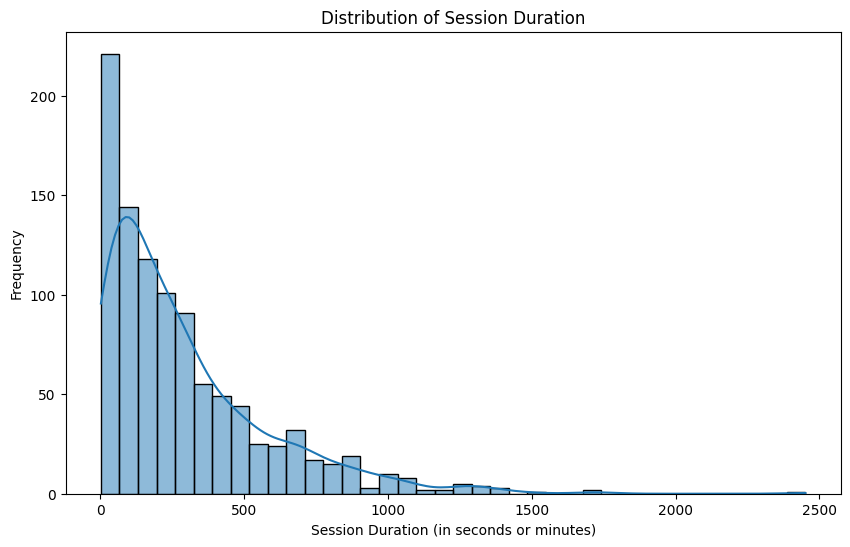

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Session_Duration'].dropna(), kde=True)  # Replace 'Session_Duration' with other columns as needed
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (in seconds or minutes)')
plt.ylabel('Frequency')
plt.show()

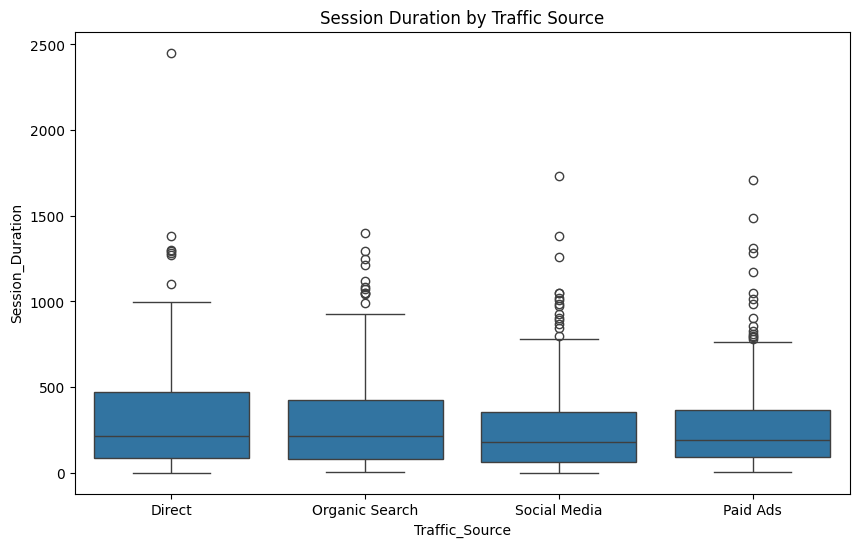

In [29]:

# Visualizing distributions

plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic_Source', y='Session_Duration', data=df1)
plt.title('Session Duration by Traffic Source')
plt.show()

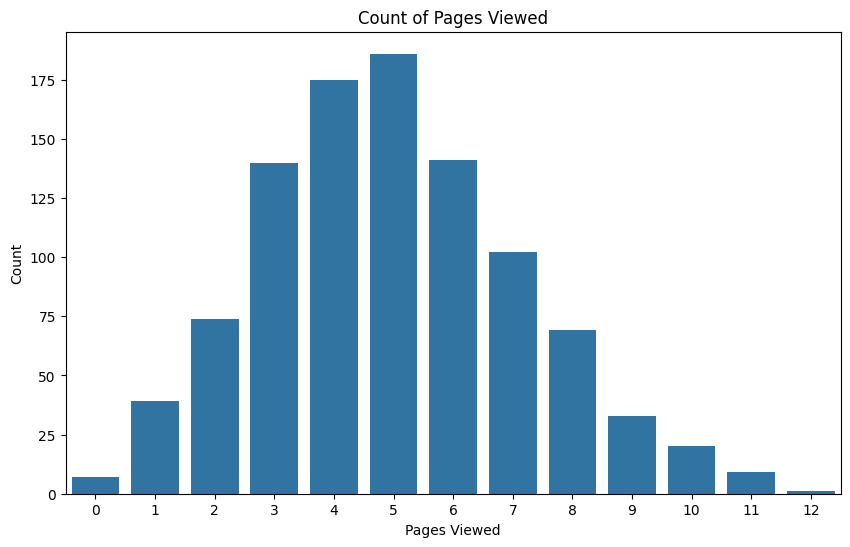

In [30]:
plt.figure(figsize=(10, 6))

# Create a countplot for the categorical column (e.g., 'Pages_Viewed')
sns.countplot(x='Pages_Viewed', data=df1)

# Set plot title and labels
plt.title('Count of Pages Viewed')
plt.xlabel('Pages Viewed')
plt.ylabel('Count')

# Display the plot
plt.show()



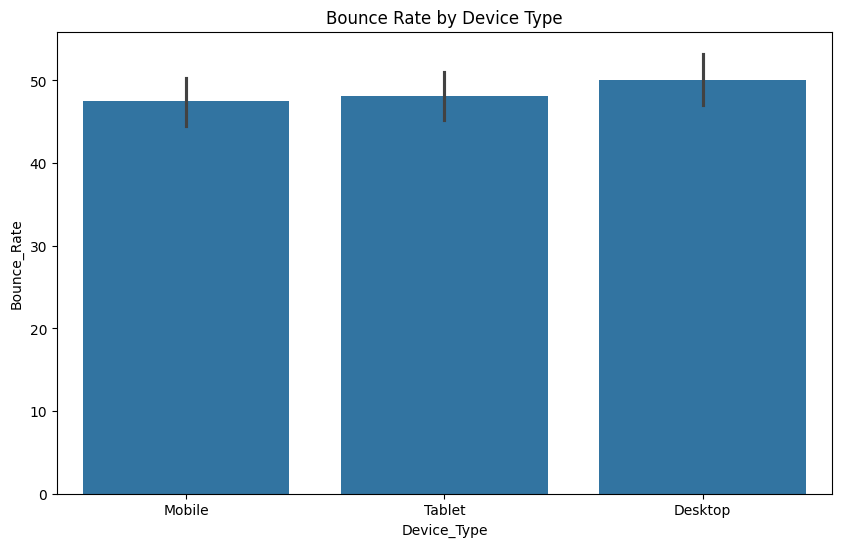

In [31]:
# Bounce Rate by Device Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Device_Type', y='Bounce_Rate', data=df1)
plt.title('Bounce Rate by Device Type')
plt.show()

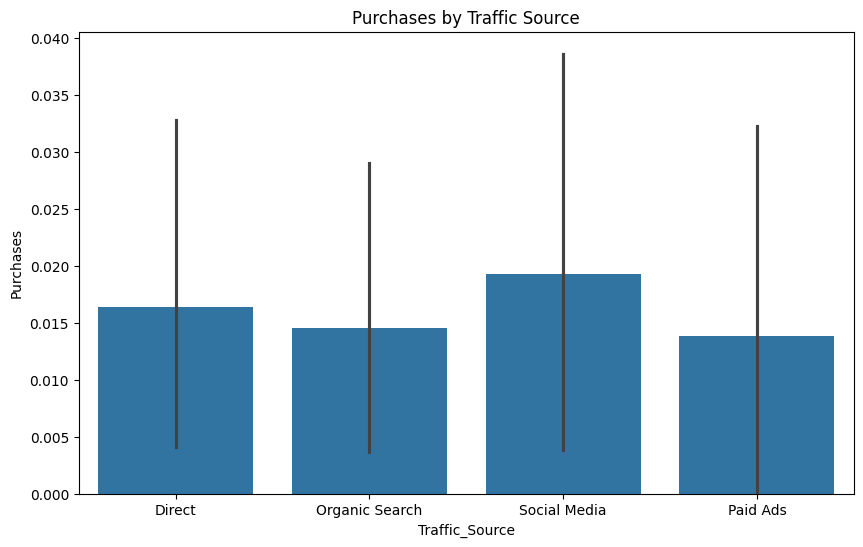

In [32]:

# Purchases by Traffic Source
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic_Source', y='Purchases', data=df1)
plt.title('Purchases by Traffic Source')
plt.show()

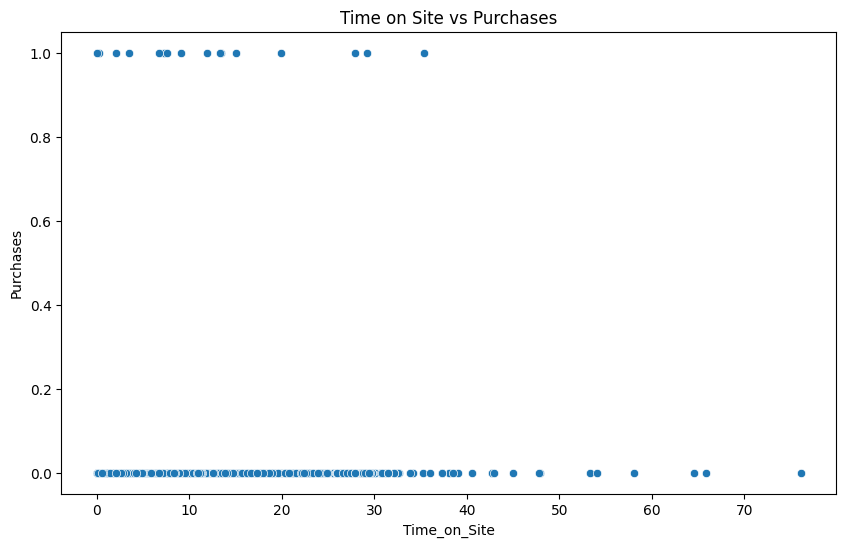

In [33]:
# Time on Site vs. Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_on_Site', y='Purchases', data=df)
plt.title('Time on Site vs Purchases')
plt.show()

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace the file path with the correct path to your CSV)
file_path = 'ecommerce_traffic_data.csv'
ecommerce_df = pd.read_csv(file_path)

# Display the first few rows to understand the data
print(ecommerce_df.head())


   User_ID  Session_Duration  Pages_Viewed Geolocation  Traffic_Source  \
0        2            903.04             4   Australia          Direct   
1        4            273.88            10     Germany  Organic Search   
2        5             50.89             3   Australia    Social Media   
3        6             50.88             4      France  Organic Search   
4        7             17.95             7         USA    Social Media   

   Bounce_Rate  Time_on_Site  Clicks Device_Type Browser Operating_System  \
0        75.75         12.75       4      Mobile    Edge              iOS   
1        70.92          4.05       4      Mobile  Safari            Linux   
2        20.03         14.06       4      Tablet  Chrome          Android   
3        21.10         10.46       2     Desktop  Chrome          Windows   
4        68.83         10.15       3      Tablet  Chrome            Linux   

   Product_Views  Cart_Additions  Purchases  Abandonment_Rate  \
0              0           

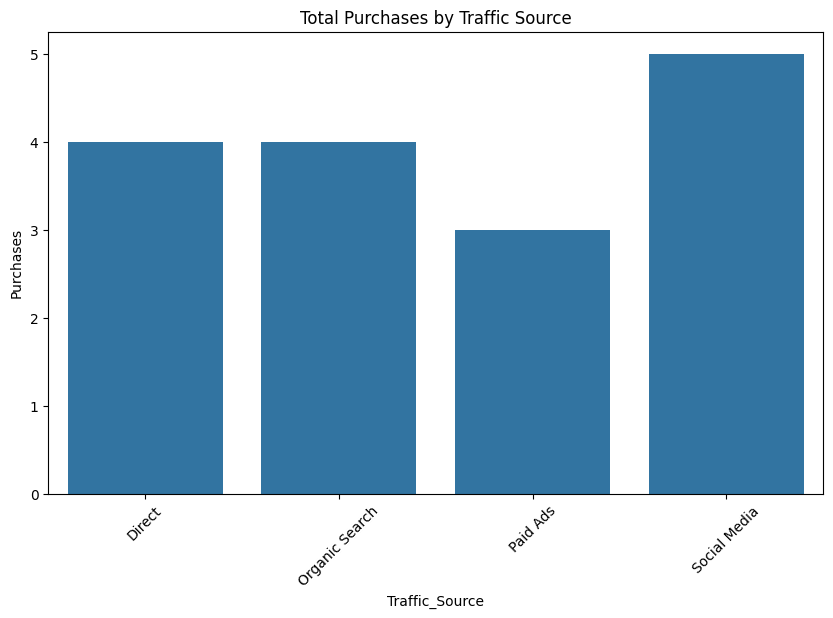

In [35]:
# Group by Traffic_Source and calculate total purchases
traffic_purchases = ecommerce_df.groupby('Traffic_Source')['Purchases'].sum().reset_index()

# Plot the total purchases by traffic source
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic_Source', y='Purchases', data=traffic_purchases)
plt.title('Total Purchases by Traffic Source')
plt.xticks(rotation=45)
plt.show()


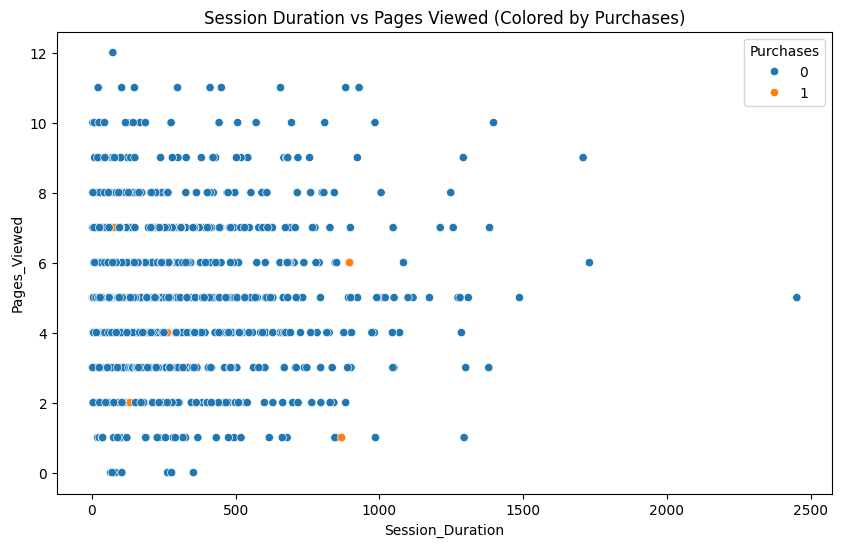

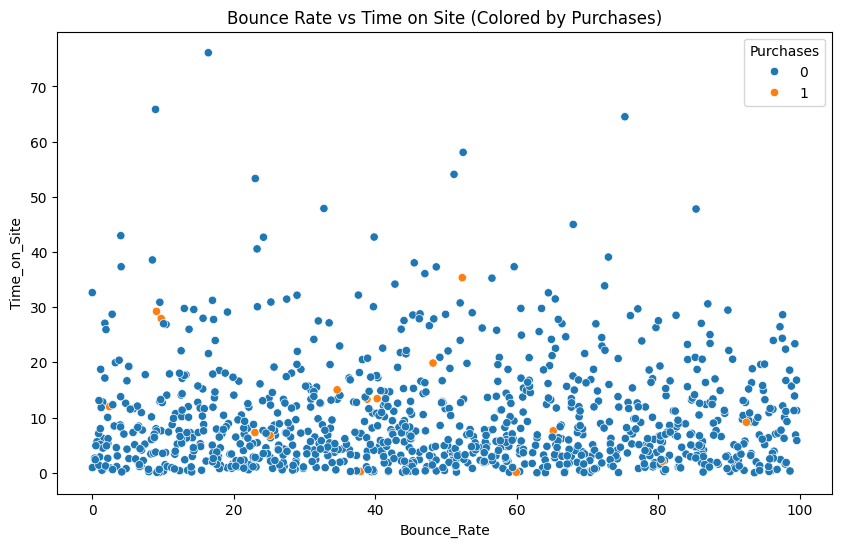

In [36]:
# Create a scatter plot to see the relationship between Session Duration and Pages Viewed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session_Duration', y='Pages_Viewed', hue='Purchases', data=ecommerce_df)
plt.title('Session Duration vs Pages Viewed (Colored by Purchases)')
plt.show()

# Investigate Bounce Rate vs Time on Site
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bounce_Rate', y='Time_on_Site', hue='Purchases', data=ecommerce_df)
plt.title('Bounce Rate vs Time on Site (Colored by Purchases)')
plt.show()


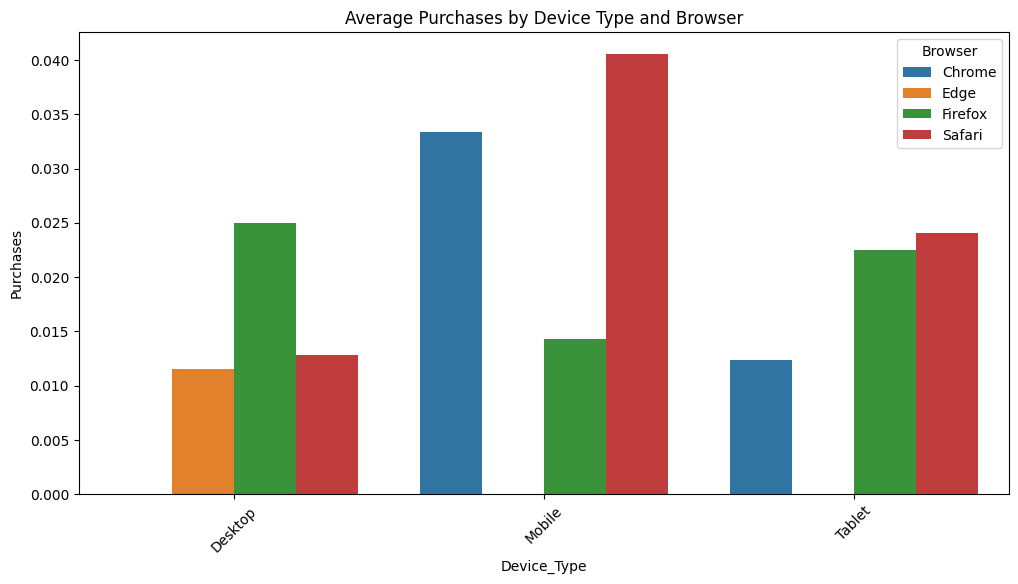

In [37]:
# Group by Device Type and Browser to find the average purchases
device_purchases = ecommerce_df.groupby(['Device_Type', 'Browser'])['Purchases'].mean().reset_index()

# Plot average purchases by device type and browser
plt.figure(figsize=(12, 6))
sns.barplot(x='Device_Type', y='Purchases', hue='Browser', data=device_purchases)
plt.title('Average Purchases by Device Type and Browser')
plt.xticks(rotation=45)
plt.show()


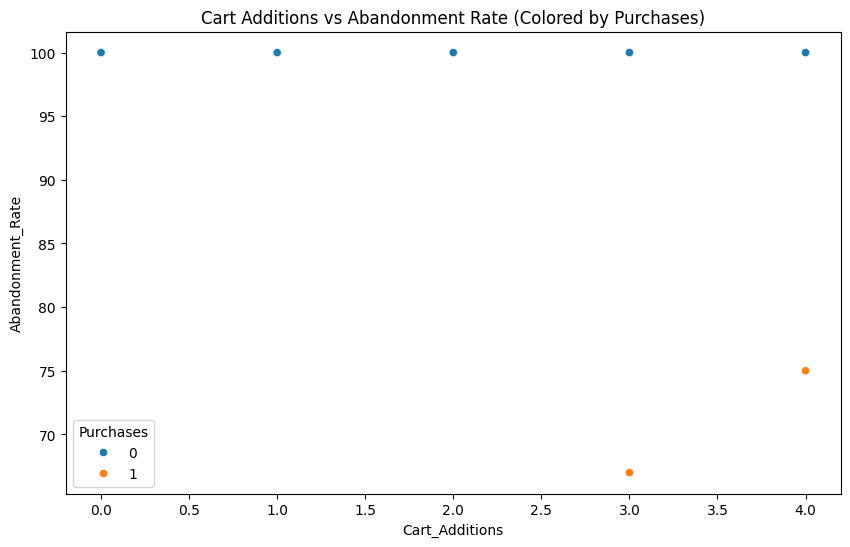

In [38]:
# Scatter plot to explore the relationship between Cart Additions and Abandonment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cart_Additions', y='Abandonment_Rate', hue='Purchases', data=ecommerce_df)
plt.title('Cart Additions vs Abandonment Rate (Colored by Purchases)')
plt.show()


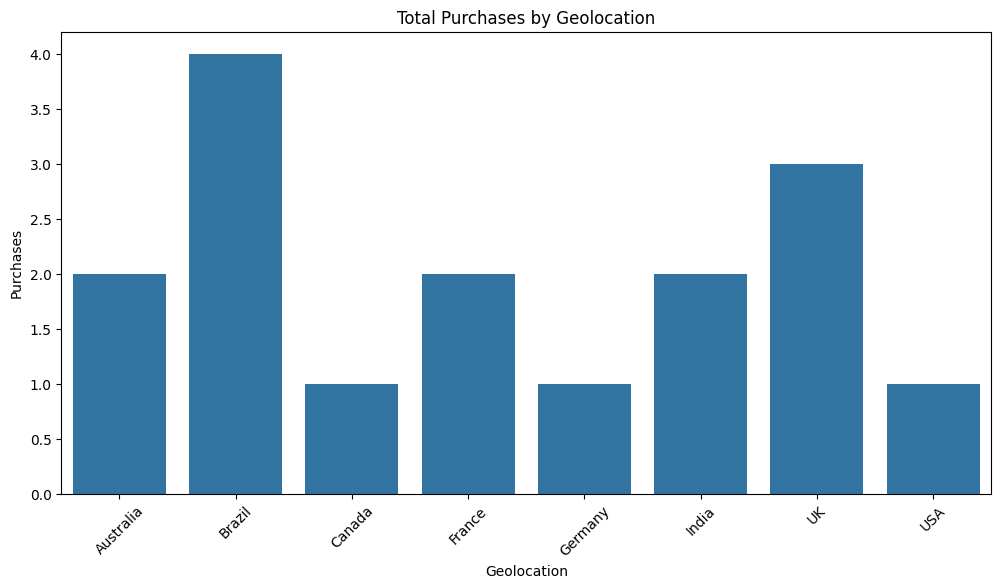

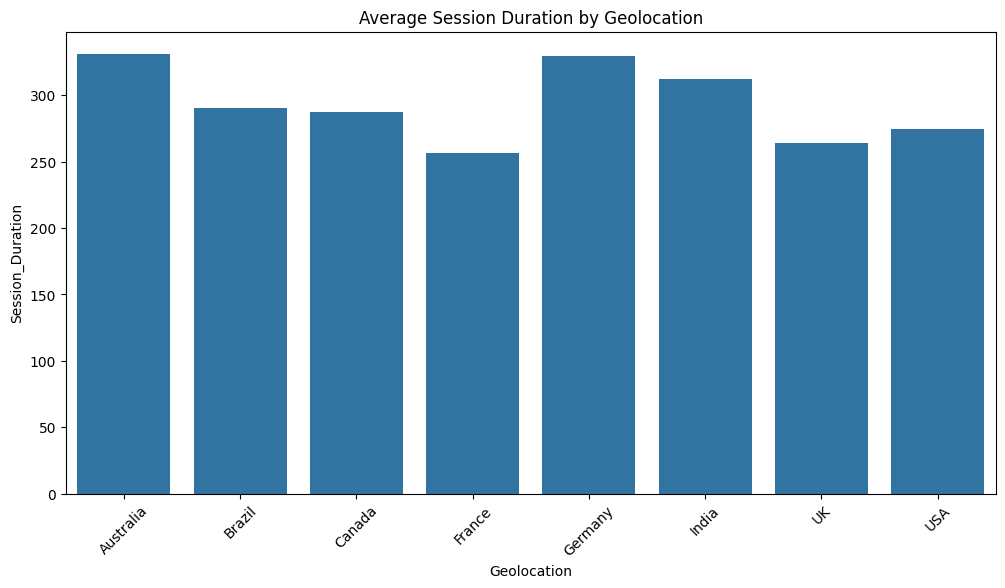

In [39]:
# Group by Geolocation and find total purchases and average session duration
geo_purchases = ecommerce_df.groupby('Geolocation')['Purchases'].sum().reset_index()
geo_session_duration = ecommerce_df.groupby('Geolocation')['Session_Duration'].mean().reset_index()

# Merge the two dataframes
geo_data = pd.merge(geo_purchases, geo_session_duration, on='Geolocation')

# Plot Purchases and Session Duration by Geolocation
plt.figure(figsize=(12, 6))
sns.barplot(x='Geolocation', y='Purchases', data=geo_data)
plt.title('Total Purchases by Geolocation')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Geolocation', y='Session_Duration', data=geo_data)
plt.title('Average Session Duration by Geolocation')
plt.xticks(rotation=45)
plt.show()


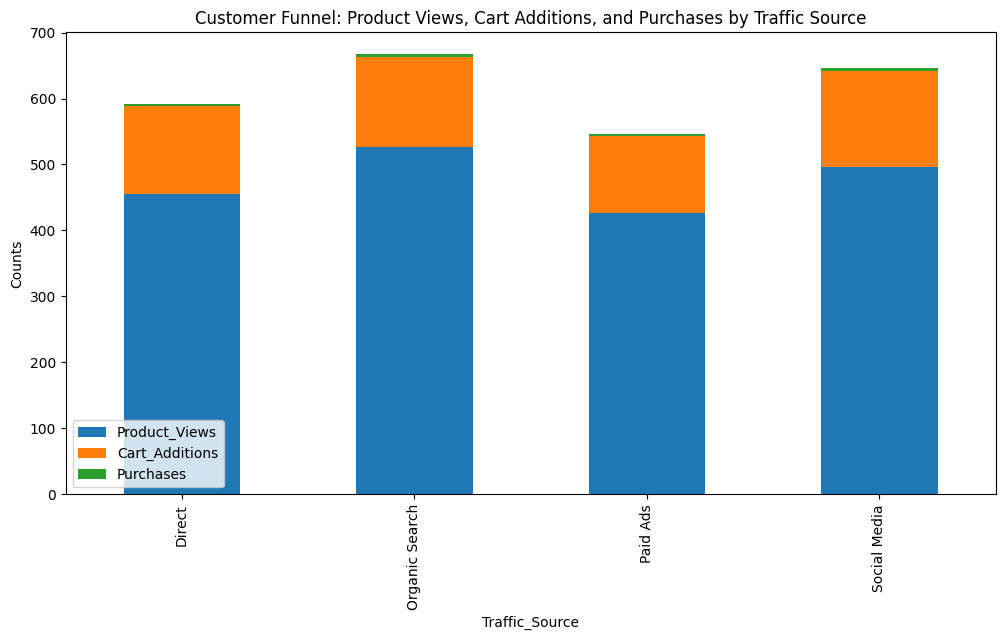

In [40]:
# Group by Traffic Source to calculate the funnel metrics
funnel_data = ecommerce_df.groupby('Traffic_Source').agg({
    'Product_Views': 'sum',
    'Cart_Additions': 'sum',
    'Purchases': 'sum'
}).reset_index()

# Plot the funnel stages for each traffic source
funnel_data.set_index('Traffic_Source').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Customer Funnel: Product Views, Cart Additions, and Purchases by Traffic Source')
plt.ylabel('Counts')
plt.show()


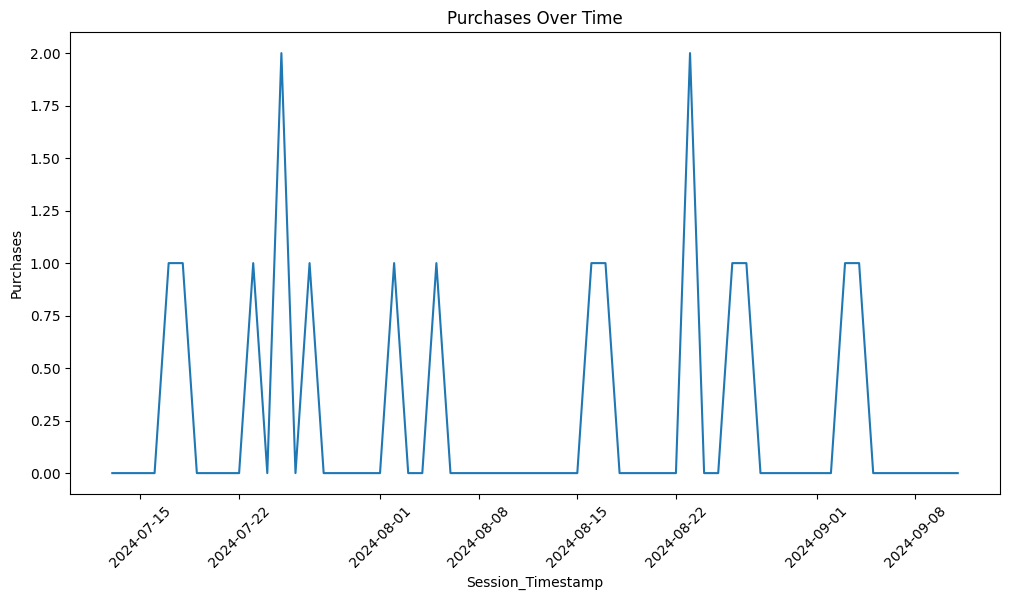

In [41]:
# Convert the timestamp column to datetime if necessary
ecommerce_df['Session_Timestamp'] = pd.to_datetime(ecommerce_df['Session_Timestamp'])

# Group by date to track purchases over time
time_series = ecommerce_df.groupby(ecommerce_df['Session_Timestamp'].dt.date)['Purchases'].sum().reset_index()

# Plot purchases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Session_Timestamp', y='Purchases', data=time_series)
plt.title('Purchases Over Time')
plt.xticks(rotation=45)
plt.show()


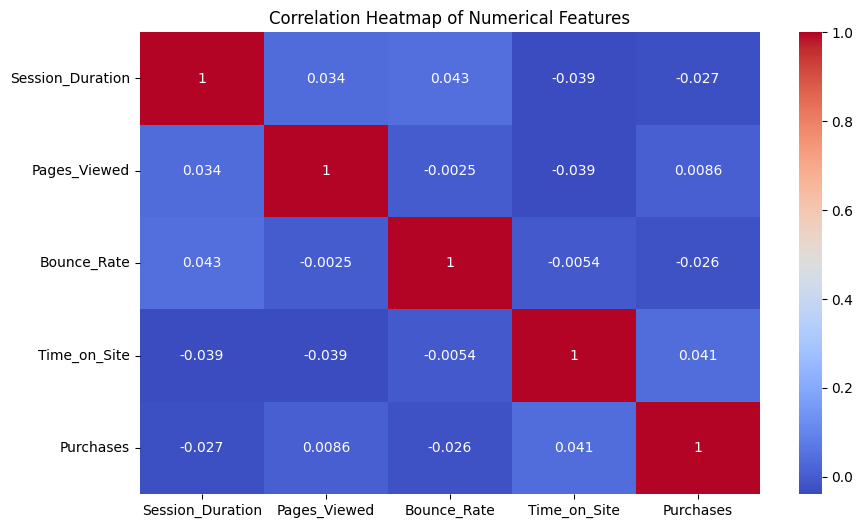

In [42]:
# Select numerical columns for correlation analysis
numerical_cols = ['Session_Duration', 'Pages_Viewed', 'Bounce_Rate', 'Time_on_Site', 'Purchases']

# Create the correlation matrix
correlation_matrix = ecommerce_df[numerical_cols].corr()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


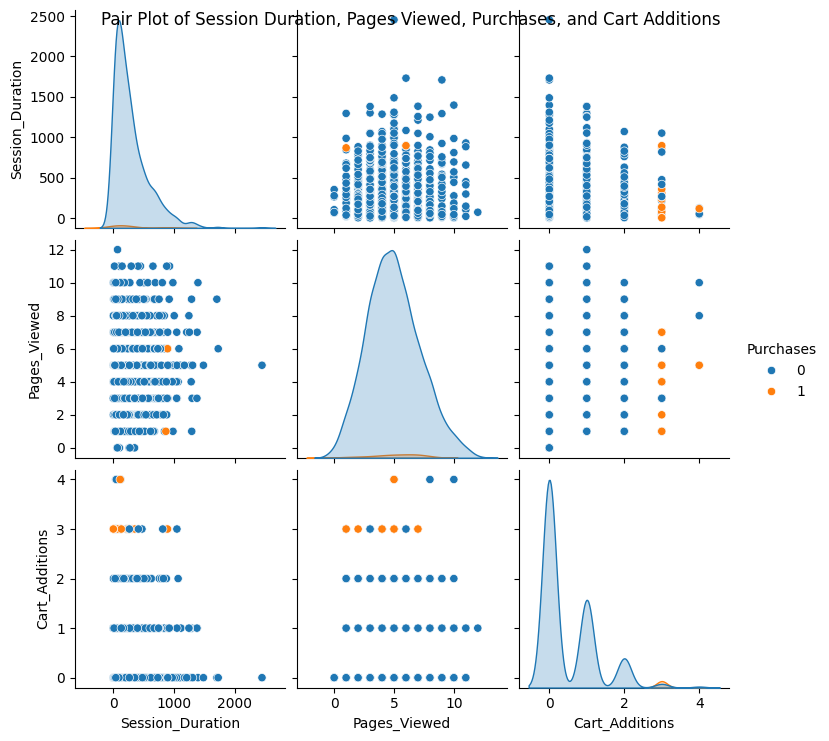

In [ ]:
# Create a pair plot for numerical features
sns.pairplot(ecommerce_df[['Session_Duration', 'Pages_Viewed', 'Purchases', 'Cart_Additions']], hue='Purchases')
plt.suptitle('Pair Plot of Session Duration, Pages Viewed, Purchases, and Cart Additions')
plt.show()
